<a href="https://colab.research.google.com/github/dayaiit/Machine-Learning/blob/main/L6_Complete_Multiclass_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.8345 - loss: 0.5250 - val_accuracy: 0.9845 - val_loss: 0.0523
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 30s 30ms/step - accuracy: 0.9718 - loss: 0.0945 - val_accuracy: 0.9855 - val_loss: 0.0464
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.9803 - loss: 0.0627 - val_accuracy: 0.9903 - val_loss: 0.0355
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.9840 - loss: 0.0503 - val_accuracy: 0.9900 - val_loss: 0.0324
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.9873 - loss: 0.0428 - val_accuracy: 0.9915 - val_loss: 0.0296

Test accuracy: 0.9916
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


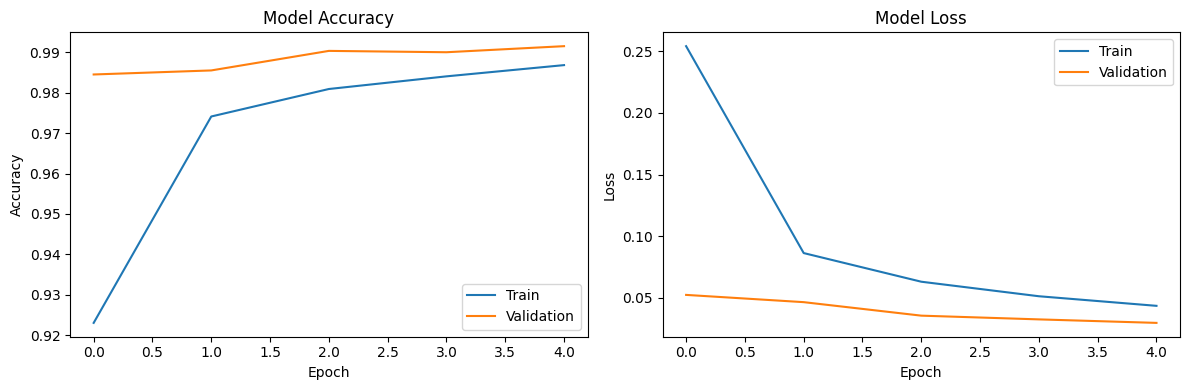

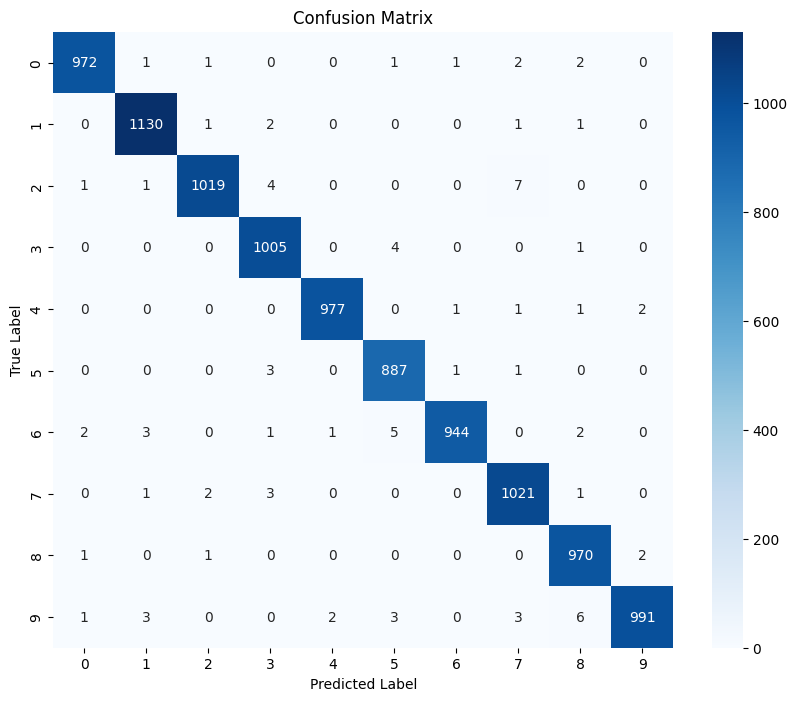

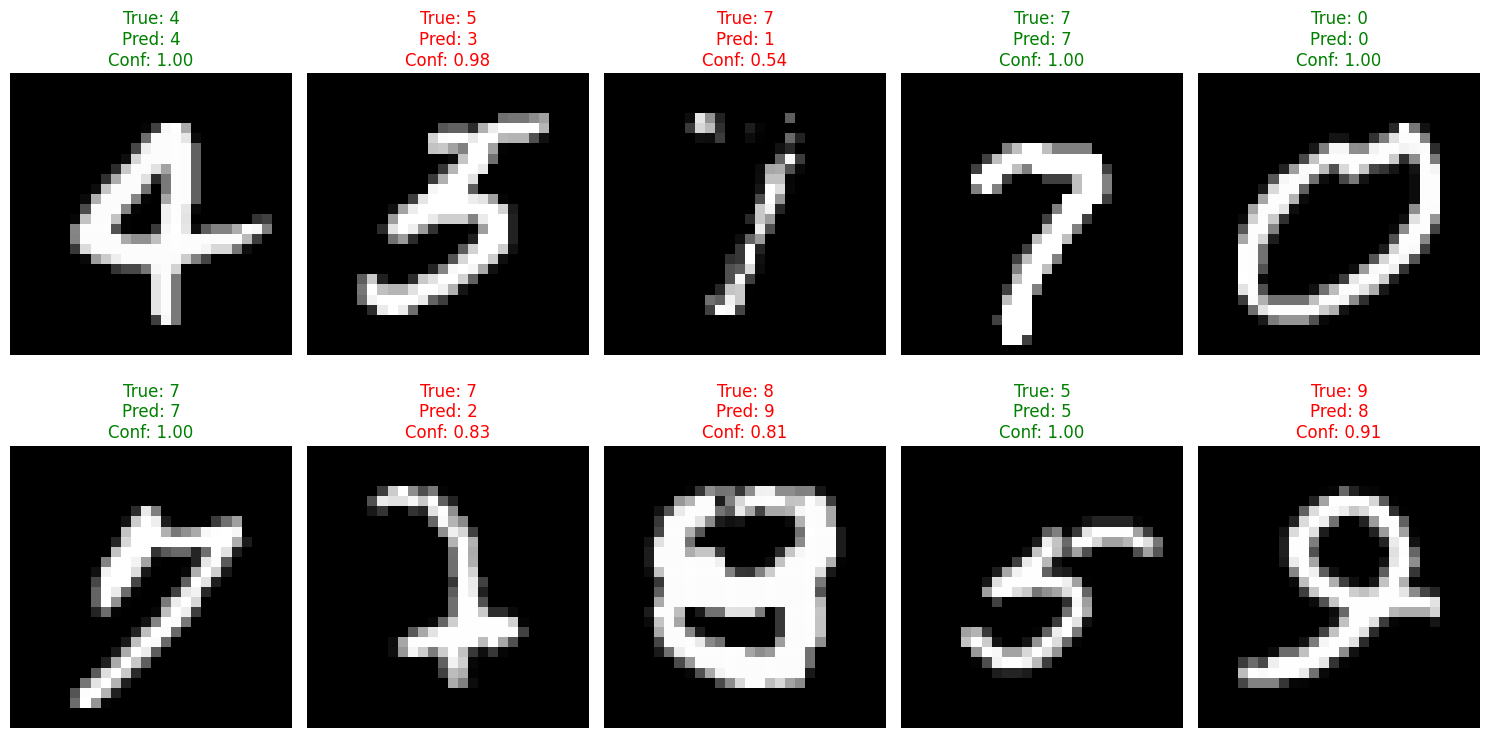

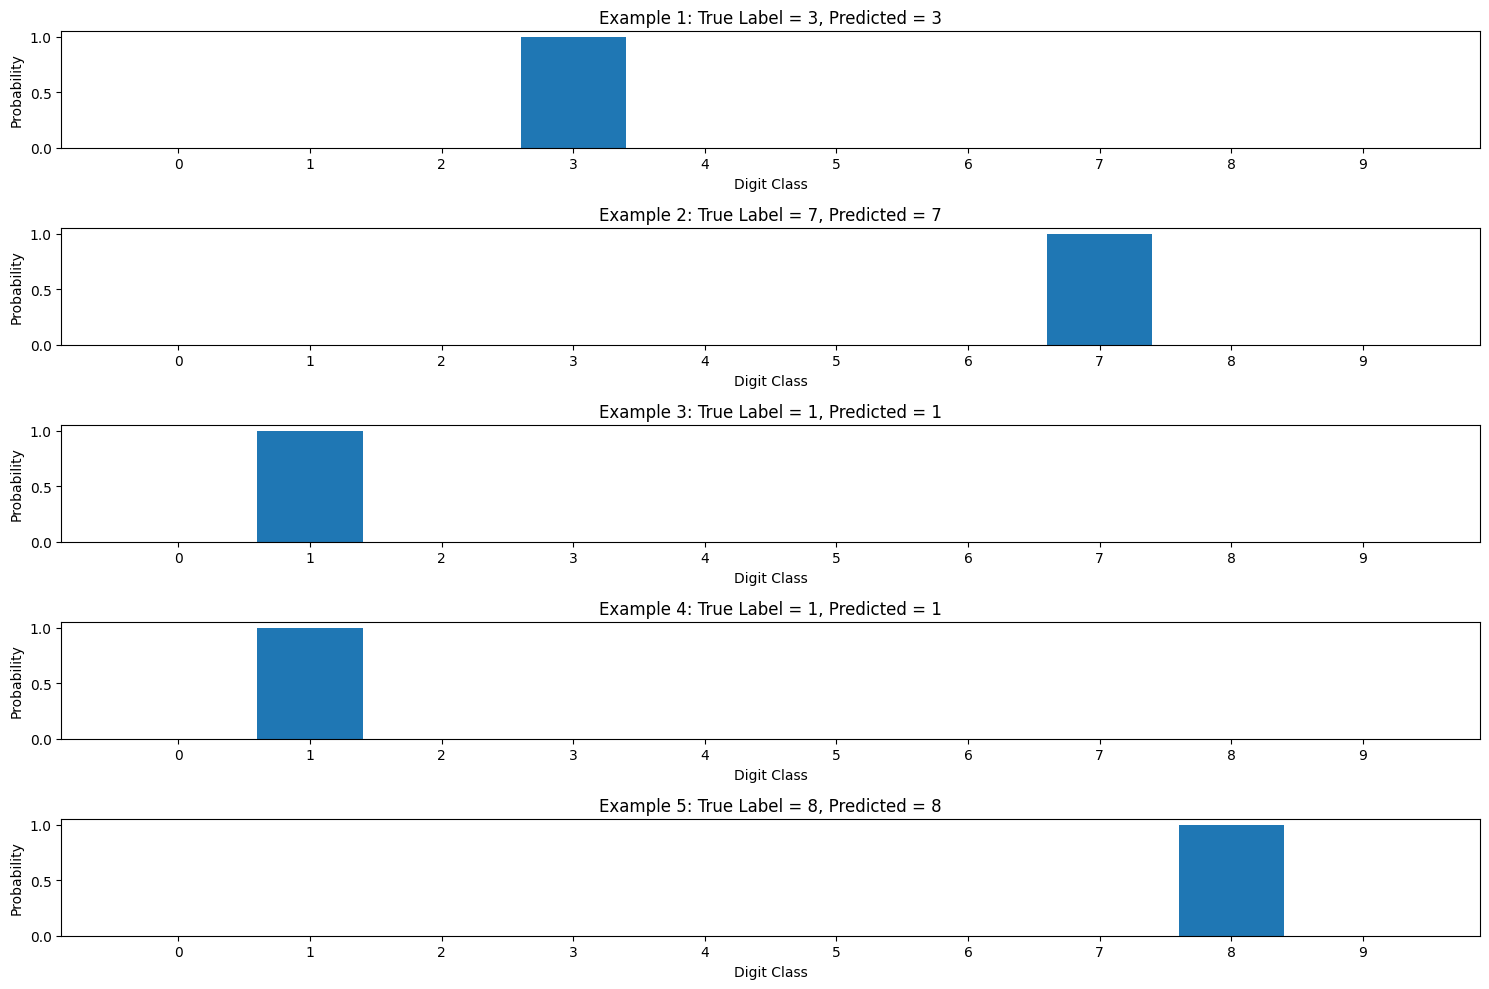


Most uncertain predictions:


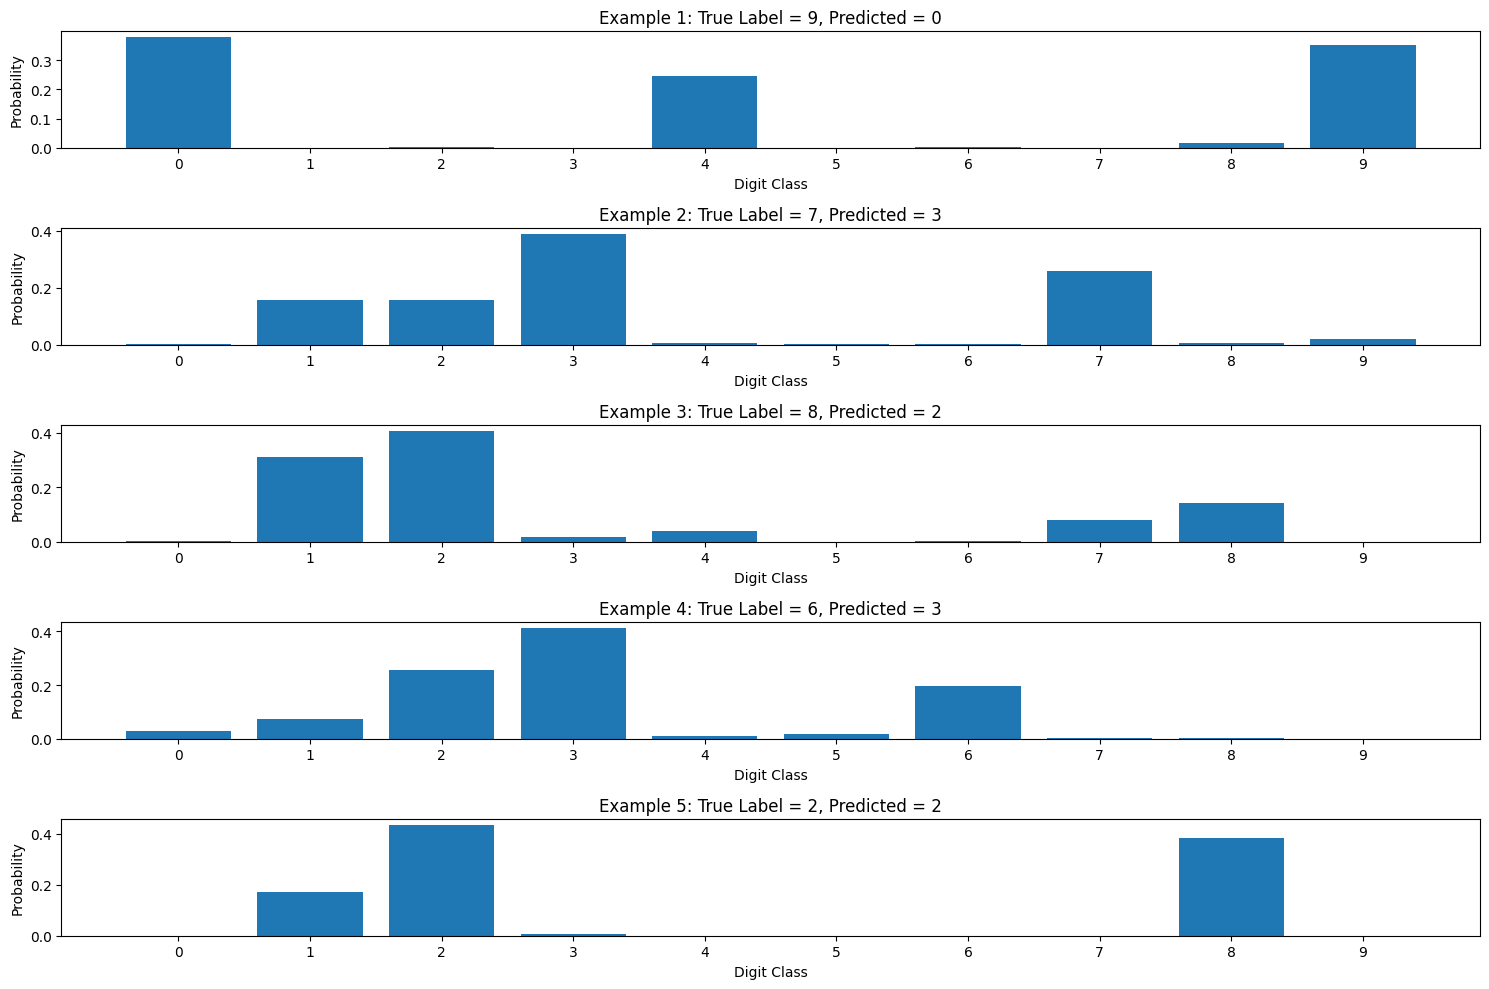

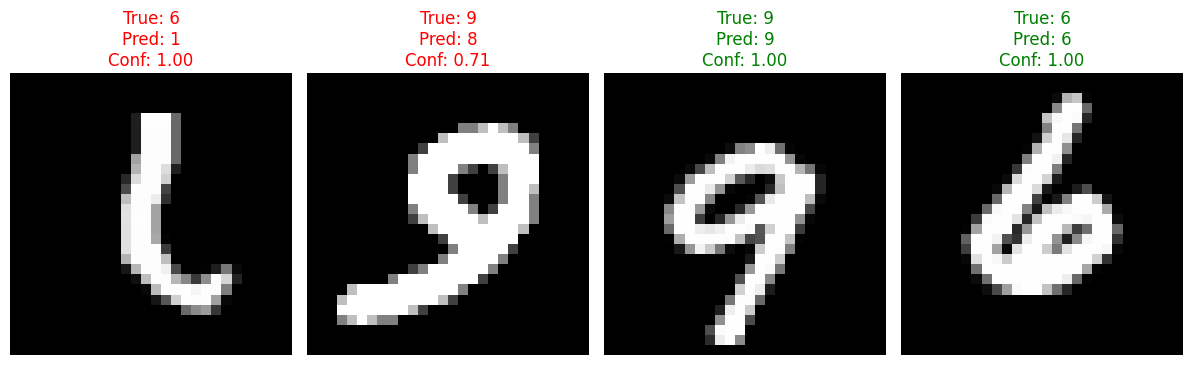

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load and prepare the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape for CNN (add channel dimension) and normalize
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

# Let's build a more powerful CNN model using our knowledge of softmax
model = Sequential([
    # Convolutional layers
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten and dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Prevent overfitting

    # Output layer with 10 units (logits) - no activation
    Dense(10)  # No activation means linear
])

# Compile with the recommended approach
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Summary of the model
print("Model Architecture:")
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

# Create a model that outputs probabilities
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_acc:.4f}")

# Get predictions
predictions = probability_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Plot the learning curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.tight_layout()
plt.show()

# Create a confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Function to display examples with predictions
def display_examples(X, y_true, predictions, predicted_classes, num_examples=10):
    # Find correct and incorrect predictions
    correct = np.where(y_true == predicted_classes)[0]
    incorrect = np.where(y_true != predicted_classes)[0]

    # Choose some examples from each
    correct_samples = np.random.choice(correct, size=num_examples//2)
    incorrect_samples = np.random.choice(incorrect, size=num_examples//2)
    indices = np.concatenate([correct_samples, incorrect_samples])
    np.random.shuffle(indices)  # Mix them up

    # Plot the examples
    plt.figure(figsize=(15, 8))
    for i, idx in enumerate(indices):
        plt.subplot(2, 5, i+1)
        plt.imshow(X[idx].reshape(28, 28), cmap='gray')

        # Get the prediction and confidence
        pred_class = predicted_classes[idx]
        confidence = predictions[idx][pred_class]

        # Create a color-coded title
        color = 'green' if pred_class == y_true[idx] else 'red'
        title = f"True: {y_true[idx]}\nPred: {pred_class}\nConf: {confidence:.2f}"

        plt.title(title, color=color)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display examples
display_examples(X_test, y_test, predictions, predicted_classes)

# Let's look at the softmax probabilities for some examples
def plot_softmax_probabilities(predictions, y_test, indices):
    """Plot the softmax probabilities for the given examples."""
    num_examples = len(indices)
    plt.figure(figsize=(15, num_examples * 2))

    for i, idx in enumerate(indices):
        plt.subplot(num_examples, 1, i+1)
        plt.bar(range(10), predictions[idx])
        plt.xticks(range(10))
        plt.xlabel('Digit Class')
        plt.ylabel('Probability')
        plt.title(f'Example {i+1}: True Label = {y_test[idx]}, Predicted = {np.argmax(predictions[idx])}')

    plt.tight_layout()
    plt.show()

# Get 5 random examples to display their probabilities
random_indices = np.random.choice(len(y_test), 5)
plot_softmax_probabilities(predictions, y_test, random_indices)

# Let's analyze the most "uncertain" predictions
def find_uncertain_predictions(predictions, y_test, n=5):
    """Find examples where the model is least certain about its prediction."""
    # Get the max probability for each prediction
    max_probs = np.max(predictions, axis=1)

    # Sort by lowest confidence
    uncertain_indices = np.argsort(max_probs)[:n]

    return uncertain_indices

# Get the most uncertain predictions
uncertain_indices = find_uncertain_predictions(predictions, y_test)
print("\nMost uncertain predictions:")
plot_softmax_probabilities(predictions, y_test, uncertain_indices)

# Display the uncertain examples
display_examples(X_test, y_test, predictions, predicted_classes, num_examples=len(uncertain_indices))